In [3]:
from scapy.all import *

In [4]:
packets = rdpcap("./reduced_sample.pcap")

In [6]:
len(packets)

1497

In [10]:
packets[0].summary()

'Ether / IP / TCP 128.3.23.5:54558 > 196.119.124.204:http S'

True

In [24]:
def validate_layer(packet):
     return all(layer in packet for layer in [Ether ,IP, TCP])
validate_layer(packets[0])

True

In [27]:
valid_packets = [packet for packet in packets if validate_layer(packet) or (print(f"Invalid packet: {packet.summary()}") and False)]
print(f"Number of valid packets: {len(valid_packets)}")

Invalid packet: Ether / IP / UDP 128.3.23.5:mdns > 224.0.0.251:mdns
Invalid packet: Ether / IP / UDP 128.3.204.42:1040 > 128.3.23.158:38293
Invalid packet: Ether / IP / ICMP 128.3.23.158 > 128.3.204.42 dest-unreach port-unreachable / IPerror / UDPerror
Invalid packet: Ether / IP / UDP 128.3.23.5:52491 > 255.255.255.255:2222
Invalid packet: Ether / IP / UDP 128.3.23.5:52493 > 128.3.97.204:domain
Invalid packet: Ether / IP / UDP 128.3.97.204:domain > 128.3.23.5:52493
Invalid packet: Ether / IP / UDP 128.3.23.117:729 > 128.3.2.102:nfs
Invalid packet: Ether / IP / UDP 128.3.2.102:nfs > 128.3.23.117:729
Invalid packet: Ether / IP / UDP 128.3.23.117:729 > 128.3.2.102:nfs
Invalid packet: Ether / IP / UDP 128.3.2.102:nfs > 128.3.23.117:729
Invalid packet: Ether / IP / UDP 128.3.23.117:729 > 128.3.2.102:nfs
Invalid packet: Ether / IP / UDP 128.3.2.102:nfs > 128.3.23.117:729
Invalid packet: Ether / 128.3.2.102 > 128.3.23.117 udp frag:185
Invalid packet: Ether / 128.3.2.102 > 128.3.23.117 udp fra

# visualize

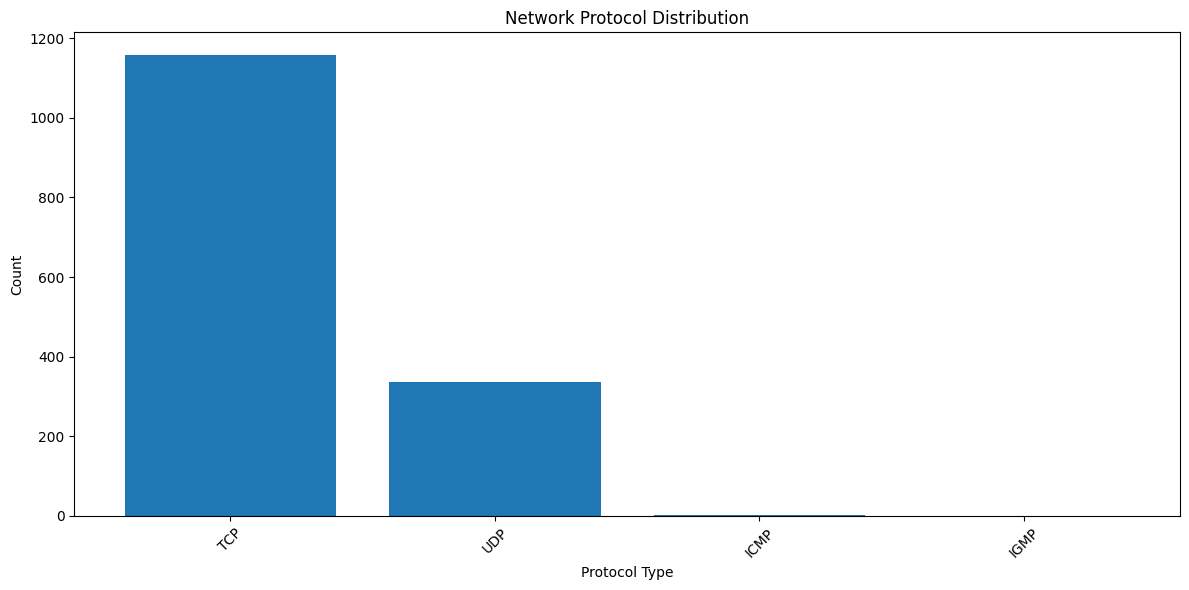

Protocol Statistics:
TCP: 1157 packets (77.3%)
UDP: 336 packets (22.4%)
ICMP: 3 packets (0.2%)
IGMP: 1 packets (0.1%)


In [38]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract protocols from all packets
protocols = []
for packet in packets:
    if IP in packet:
        protocol = packet[IP].proto
        protocols.append(protocol)

# Count different protocols
protocol_counts = Counter(protocols)

# Convert protocol numbers to names
protocol_names = {
    1: 'ICMP',
    6: 'TCP',
    17: 'UDP',
    2: 'IGMP',
    41: 'IPv6',
    47: 'GRE',
    50: 'ESP',
    51: 'AH',
    89: 'OSPF'
}

# Convert numeric codes to names
labeled_protocol_counts = {}
for proto_code, count in protocol_counts.items():
    proto_name = protocol_names.get(proto_code, f'Protocol({proto_code})')
    labeled_protocol_counts[proto_name] = count

# Draw bar chart for protocols
plt.figure(figsize=(12, 6))
plt.bar(labeled_protocol_counts.keys(), labeled_protocol_counts.values())
plt.title('Network Protocol Distribution')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display protocol statistics
print("Protocol Statistics:")
total_packets = len(packets)
for proto_name, count in labeled_protocol_counts.items():
    percentage = (count / total_packets) * 100
    print(f"{proto_name}: {count} packets ({percentage:.1f}%)")

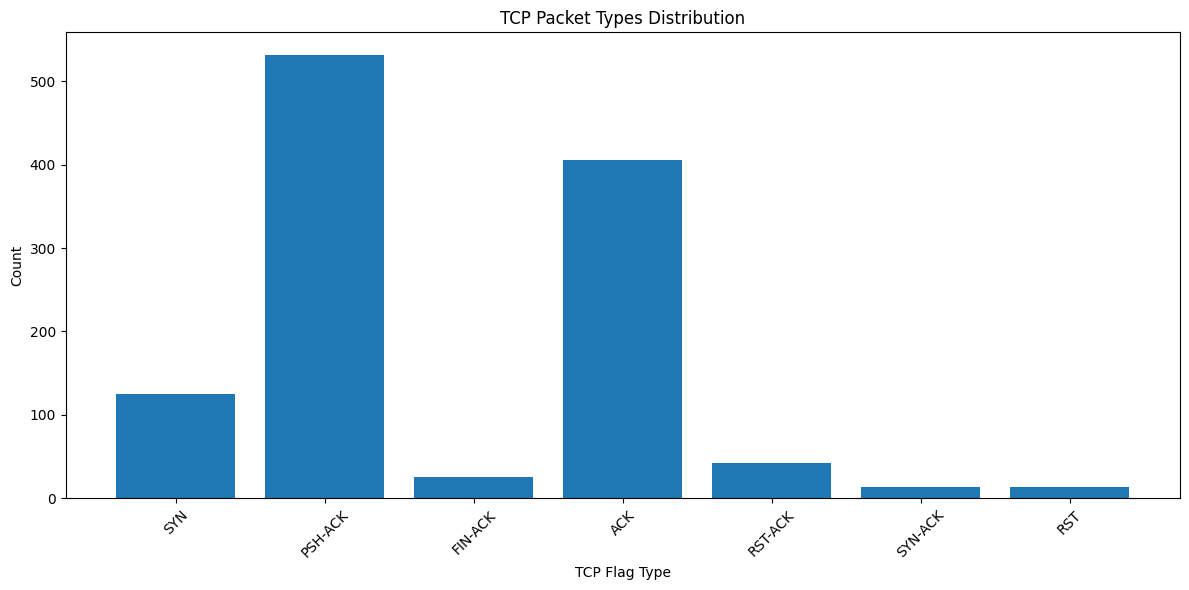

TCP Flags Statistics:
SYN: 125 packets (10.8%)
PSH-ACK: 532 packets (46.0%)
FIN-ACK: 25 packets (2.2%)
ACK: 406 packets (35.1%)
RST-ACK: 42 packets (3.6%)
SYN-ACK: 14 packets (1.2%)
RST: 13 packets (1.1%)


In [36]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract TCP flags from valid packets
tcp_flags = []
for packet in valid_packets:
    if TCP in packet:
        flags = packet[TCP].flags
        tcp_flags.append(flags)

# Count different flags
flag_counts = Counter(tcp_flags)

# Convert numeric flag codes to readable names
flag_names = {
    2: 'SYN',
    18: 'SYN-ACK', 
    16: 'ACK',
    17: 'FIN-ACK',
    24: 'PSH-ACK',
    4: 'RST',
    20: 'RST-ACK',
    1: 'FIN',
    25: 'FIN-PSH-ACK'
}

# Convert numeric codes to names
labeled_counts = {}
for flag_code, count in flag_counts.items():
    flag_name = flag_names.get(flag_code, f'Unknown({flag_code})')
    labeled_counts[flag_name] = count

# Draw bar chart
plt.figure(figsize=(12, 6))
plt.bar(labeled_counts.keys(), labeled_counts.values())
plt.title('TCP Packet Types Distribution')
plt.xlabel('TCP Flag Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display statistics
print("TCP Flags Statistics:")
for flag_name, count in labeled_counts.items():
    percentage = (count / len(valid_packets)) * 100
    print(f"{flag_name}: {count} packets ({percentage:.1f}%)")

In [39]:
# 1. Check for suspicious IP addresses and traffic patterns
import matplotlib.pyplot as plt
from collections import Counter

# Extract source and destination IPs
src_ips = []
dst_ips = []
for packet in valid_packets:
    if IP in packet:
        src_ips.append(packet[IP].src)
        dst_ips.append(packet[IP].dst)

# Find top talkers
src_counter = Counter(src_ips)
dst_counter = Counter(dst_ips)

print("Top 10 Source IPs:")
for ip, count in src_counter.most_common(10):
    percentage = (count / len(valid_packets)) * 100
    print(f"{ip}: {count} packets ({percentage:.1f}%)")

print("\nTop 10 Destination IPs:")
for ip, count in dst_counter.most_common(10):
    percentage = (count / len(valid_packets)) * 100
    print(f"{ip}: {count} packets ({percentage:.1f}%)")

Top 10 Source IPs:
128.3.23.117: 416 packets (36.0%)
128.55.238.129: 227 packets (19.6%)
128.3.23.42: 134 packets (11.6%)
128.3.164.194: 87 packets (7.5%)
128.3.23.5: 58 packets (5.0%)
128.3.164.248: 58 packets (5.0%)
128.3.23.158: 44 packets (3.8%)
128.55.150.95: 36 packets (3.1%)
128.3.164.249: 28 packets (2.4%)
128.3.23.2: 16 packets (1.4%)

Top 10 Destination IPs:
128.3.23.117: 371 packets (32.1%)
128.55.238.129: 253 packets (21.9%)
128.3.164.249: 134 packets (11.6%)
128.3.164.194: 115 packets (9.9%)
128.3.164.248: 62 packets (5.4%)
196.119.124.204: 53 packets (4.6%)
128.55.150.95: 36 packets (3.1%)
128.3.23.42: 28 packets (2.4%)
128.3.23.158: 18 packets (1.6%)
128.3.204.49: 16 packets (1.4%)


In [41]:
# 2. Check for unusual ports
src_ports = []
dst_ports = []
for packet in valid_packets:
    if TCP in packet:
        src_ports.append(packet[TCP].sport)
        dst_ports.append(packet[TCP].dport)

sport_counter = Counter(src_ports)
dport_counter = Counter(dst_ports)

print("Top 10 Source Ports:")
for port, count in sport_counter.most_common(10):
    print(f"Port {port}: {count} packets")

print("\nTop 10 Destination Ports:")
for port, count in dport_counter.most_common(10):
    print(f"Port {port}: {count} packets")

Top 10 Source Ports:
Port 57546: 253 packets
Port 22: 227 packets
Port 35900: 133 packets
Port 25: 81 packets
Port 995: 77 packets
Port 515: 36 packets
Port 53413: 20 packets
Port 62654: 18 packets
Port 62655: 16 packets
Port 62658: 16 packets

Top 10 Destination Ports:
Port 22: 253 packets
Port 57546: 227 packets
Port 25: 191 packets
Port 995: 95 packets
Port 80: 59 packets
Port 515: 36 packets
Port 35900: 27 packets
Port 143: 20 packets
Port 9100: 16 packets
Port 62654: 15 packets


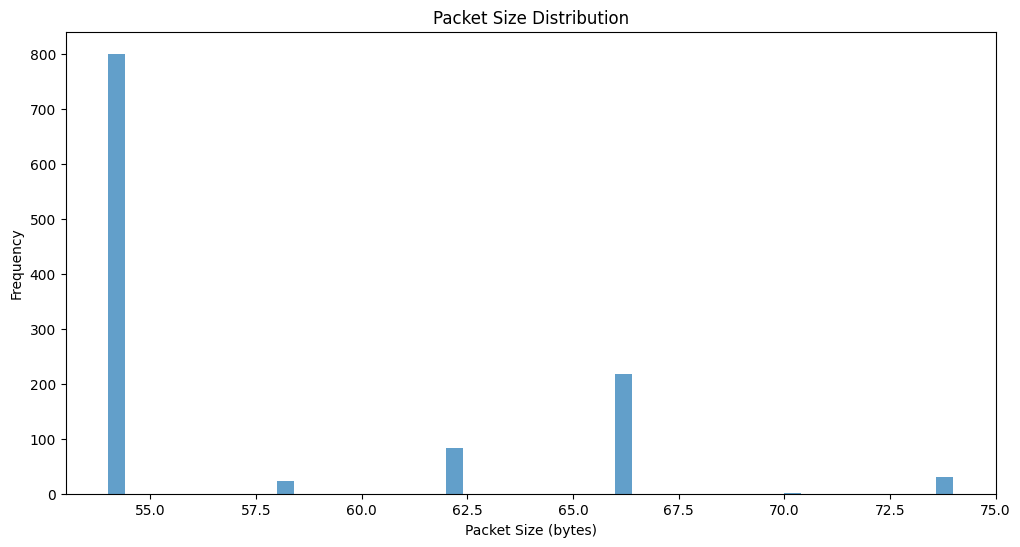

Average packet size: 57.47 bytes
Min packet size: 54 bytes
Max packet size: 74 bytes


In [40]:
# 3. Check packet sizes for anomalies
packet_sizes = []
for packet in valid_packets:
    packet_sizes.append(len(packet))

plt.figure(figsize=(12, 6))
plt.hist(packet_sizes, bins=50, alpha=0.7)
plt.title('Packet Size Distribution')
plt.xlabel('Packet Size (bytes)')
plt.ylabel('Frequency')
plt.show()

print(f"Average packet size: {sum(packet_sizes)/len(packet_sizes):.2f} bytes")
print(f"Min packet size: {min(packet_sizes)} bytes")
print(f"Max packet size: {max(packet_sizes)} bytes")

In [42]:
# 4. Check for suspicious flag combinations
suspicious_flags = []
for packet in valid_packets:
    if TCP in packet:
        flags = packet[TCP].flags
        # Check for unusual flag combinations
        if flags in [6, 12, 3, 9]:  # SYN+RST, PSH+RST, SYN+FIN, FIN+RST
            suspicious_flags.append(flags)

if suspicious_flags:
    print(f"Found {len(suspicious_flags)} packets with suspicious flag combinations")
    sus_counter = Counter(suspicious_flags)
    for flag, count in sus_counter.items():
        print(f"Flag {flag}: {count} packets")
else:
    print("No suspicious flag combinations found")

No suspicious flag combinations found


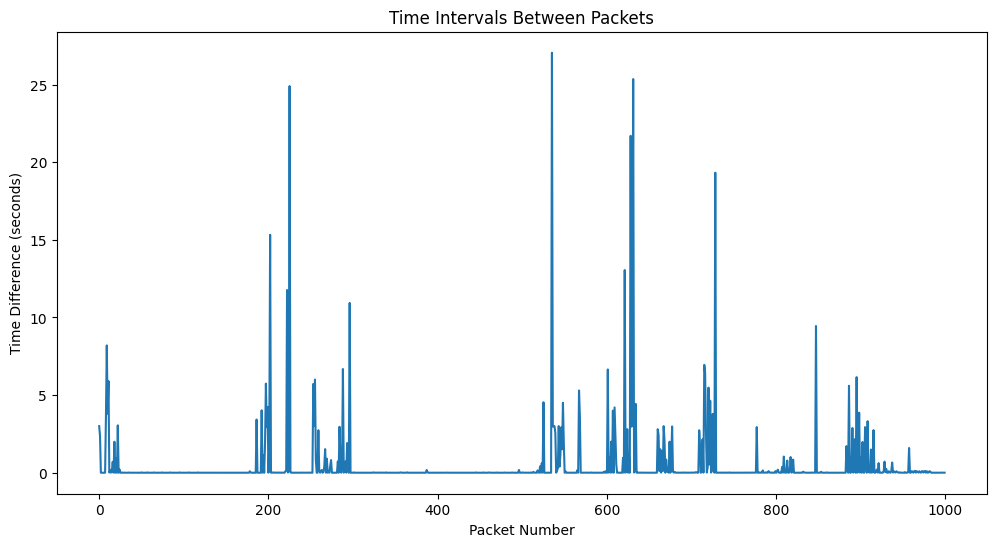

Average time between packets: 0.3959 seconds
Standard deviation: 1.8284 seconds


In [43]:
# 5. Time-based analysis
from datetime import datetime
import numpy as np

# Extract timestamps
timestamps = []
for packet in packets:
    timestamps.append(float(packet.time))

# Convert to time intervals
time_diffs = np.diff(timestamps)

plt.figure(figsize=(12, 6))
plt.plot(time_diffs[:1000])  # Plot first 1000 intervals
plt.title('Time Intervals Between Packets')
plt.xlabel('Packet Number')
plt.ylabel('Time Difference (seconds)')
plt.show()

print(f"Average time between packets: {np.mean(time_diffs):.4f} seconds")
print(f"Standard deviation: {np.std(time_diffs):.4f} seconds")

In [46]:
# 6. Check for potential scanning activities
connection_attempts = {}
for packet in valid_packets:
    if TCP in packet and packet[TCP].flags == 2:  # SYN packets
        src_ip = packet[IP].src
        dst_port = packet[TCP].dport
        
        if src_ip not in connection_attempts:
            connection_attempts[src_ip] = set()
        connection_attempts[src_ip].add(dst_port)

# Find IPs connecting to many different ports (potential port scanning)
print("Potential port scanning activities:")
for ip, ports in connection_attempts.items():
    if len(ports) > 2:  # Threshold for suspicious activity
        print(f"{ip}: attempted connections to {len(ports)} different ports")

Potential port scanning activities:
128.3.23.117: attempted connections to 3 different ports
128.3.23.158: attempted connections to 3 different ports


# next

In [56]:
def update_tcp_flag_dict(packet, syn_count, syn_ack_count):
    if packet[TCP].flags == "S":
        syn_count[packet[IP].src] = syn_count.get(packet[IP].src, 0) + 1
    elif packet[TCP].flags == "SA":
        syn_ack_count[packet[IP].dst] = syn_ack_count.get(packet[IP].dst, 0) + 1

def count_S_SA(packets):
    syn_count = dict()
    syn_ack_count = dict()
    
    for p in packets:
        update_tcp_flag_dict(p, syn_count, syn_ack_count)
    
    return syn_count, syn_ack_count

SC, SAC = count_S_SA(valid_packets)

In [ ]:
RATE = 3
def find_suspicious_ips(syn_counts, synack_counts):
    suspicious_ips = []
    for ip in syn_counts.keys():
        if syn_counts[ip] > synack_counts.get(ip, 0) * RATE:
            suspicious_ips.append(ip)
    return suspicious_ips

suspicious = find_suspicious_ips(SC, SAC)
for ip in suspicious:
    print(ip)

128.3.23.5
128.3.23.117
128.3.164.249
128.3.23.158
128.3.164.248
128.3.23.2


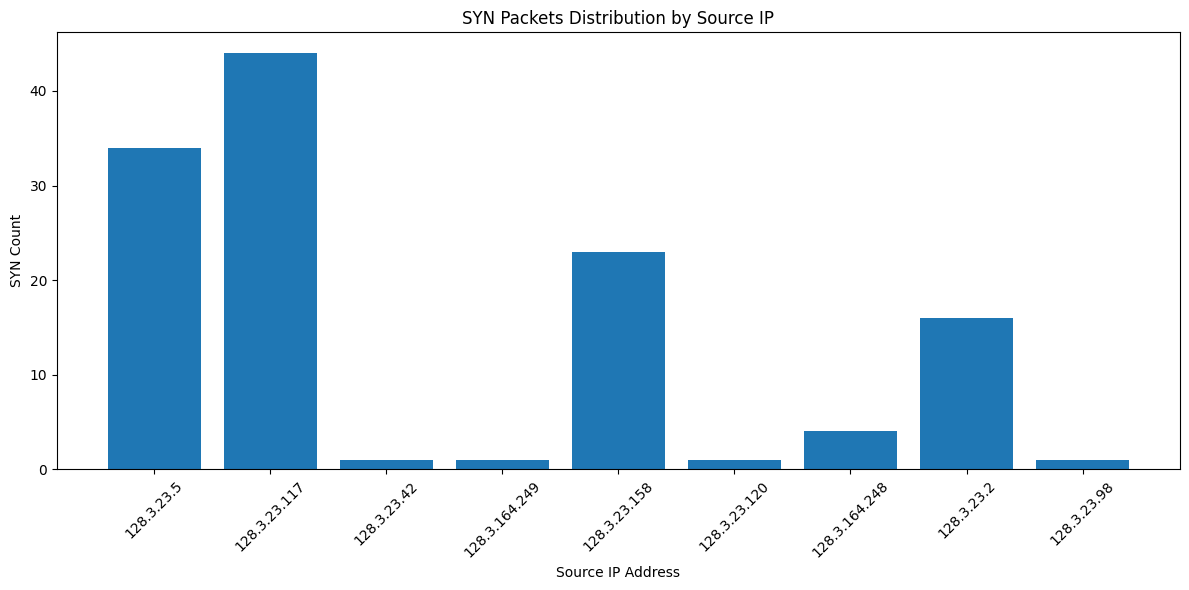

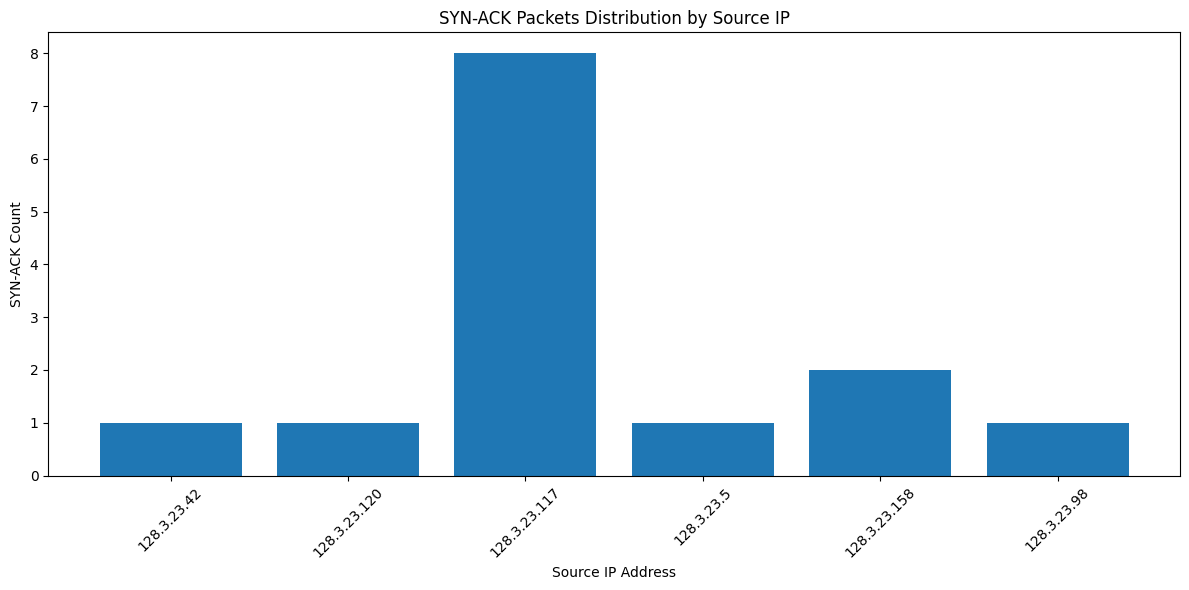

SYN Packets Statistics:
128.3.23.5: 34 SYN packets
128.3.23.117: 44 SYN packets
128.3.23.42: 1 SYN packets
128.3.164.249: 1 SYN packets
128.3.23.158: 23 SYN packets
128.3.23.120: 1 SYN packets
128.3.164.248: 4 SYN packets
128.3.23.2: 16 SYN packets
128.3.23.98: 1 SYN packets

SYN-ACK Packets Statistics:
128.3.23.42: 1 SYN-ACK packets
128.3.23.120: 1 SYN-ACK packets
128.3.23.117: 8 SYN-ACK packets
128.3.23.5: 1 SYN-ACK packets
128.3.23.158: 2 SYN-ACK packets
128.3.23.98: 1 SYN-ACK packets

Potential Attack Analysis:
Suspicious: 128.3.23.5 sent 34 SYN but received 1 SYN-ACK
Suspicious: 128.3.23.117 sent 44 SYN but received 8 SYN-ACK
Suspicious: 128.3.164.249 sent 1 SYN but received 0 SYN-ACK
Suspicious: 128.3.23.158 sent 23 SYN but received 2 SYN-ACK
Suspicious: 128.3.164.248 sent 4 SYN but received 0 SYN-ACK
Suspicious: 128.3.23.2 sent 16 SYN but received 0 SYN-ACK


In [58]:
# Visualize SYN count distribution
plt.figure(figsize=(12, 6))
plt.bar(SC.keys(), SC.values())
plt.title('SYN Packets Distribution by Source IP')
plt.xlabel('Source IP Address')
plt.ylabel('SYN Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize SYN-ACK count distribution
plt.figure(figsize=(12, 6))
plt.bar(SAC.keys(), SAC.values())
plt.title('SYN-ACK Packets Distribution by Source IP')
plt.xlabel('Source IP Address')
plt.ylabel('SYN-ACK Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display statistics
print("SYN Packets Statistics:")
for ip, count in SC.items():
    print(f"{ip}: {count} SYN packets")

print("\nSYN-ACK Packets Statistics:")
for ip, count in SAC.items():
    print(f"{ip}: {count} SYN-ACK packets")

# Compare SYN vs SYN-ACK for potential attack detection
print("\nPotential Attack Analysis:")
for ip in SC.keys():
    syn_count = SC.get(ip, 0)
    syn_ack_count = SAC.get(ip, 0)
    if syn_count > syn_ack_count * 3:  # More SYN than SYN-ACK might indicate SYN flood
        print(f"Suspicious: {ip} sent {syn_count} SYN but received {syn_ack_count} SYN-ACK")